In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INPUT_PATH, OUTPUT_PATH

In [2]:
for f in INPUT_PATH.iterdir():
    print(f)

/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/test_meta.parquet
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/train_events
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/test
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/train
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/train_meta.parquet
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/sample_submission.parquet
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/sensor_geometry_v2.csv
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/folds.parquet
/mnt/storage_dimm2/kaggle_data/icecube-neutrinos-in-deep-ice/sensor_geometry.csv


# String specific details

In [3]:
sensors = pd.read_csv(INPUT_PATH / "sensor_geometry.csv")
sensors

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95
...,...,...,...,...
5155,5155,-10.97,6.72,-472.39
5156,5156,-10.97,6.72,-479.39
5157,5157,-10.97,6.72,-486.40
5158,5158,-10.97,6.72,-493.41


In [4]:
sensors["string"] = 0
sensors["qe"] = 1

for i in range(len(sensors) // 60):
    start, end = i * 60, (i * 60) + 60
    sensors.loc[start:end, "string"] = i
    
    # High Quantum Efficiency in the lower 50 DOMs - https://arxiv.org/pdf/2209.03042.pdf (Figure 1)
    if i in range(78, 86):
        start_veto, end_veto = i * 60, (i * 60) + 10
        start_core, end_core = end_veto + 1, (i * 60) + 60
        sensors.loc[start_core:end_core, "qe"] = 1.35
        
sensors.to_csv(INPUT_PATH / "sensor_geometry_v2.csv", index=False)

In [5]:
sensors.loc[1200: 1259]

,sensor_id,x,y,z,string,qe
1200,1200,443.60,-194.16,516.67,20,1.0
1201,1201,443.60,-194.12,499.65,20,1.0
1202,1202,443.63,-194.08,482.63,20,1.0
1203,1203,443.66,-194.04,465.61,20,1.0
1204,1204,443.70,-194.02,448.59,20,1.0
1205,1205,443.75,-194.01,431.57,20,1.0
1206,1206,443.80,-194.01,414.55,20,1.0
1207,1207,443.85,-194.02,397.53,20,1.0
1208,1208,443.89,-194.04,380.51,20,1.0
1209,1209,443.93,-194.08,363.49,20,1.0


In [6]:
sensors.loc[1200, ["x", "y"]] - sensors.loc[1259, ["x", "y"]]

x   -0.45
y    0.30
dtype: float64

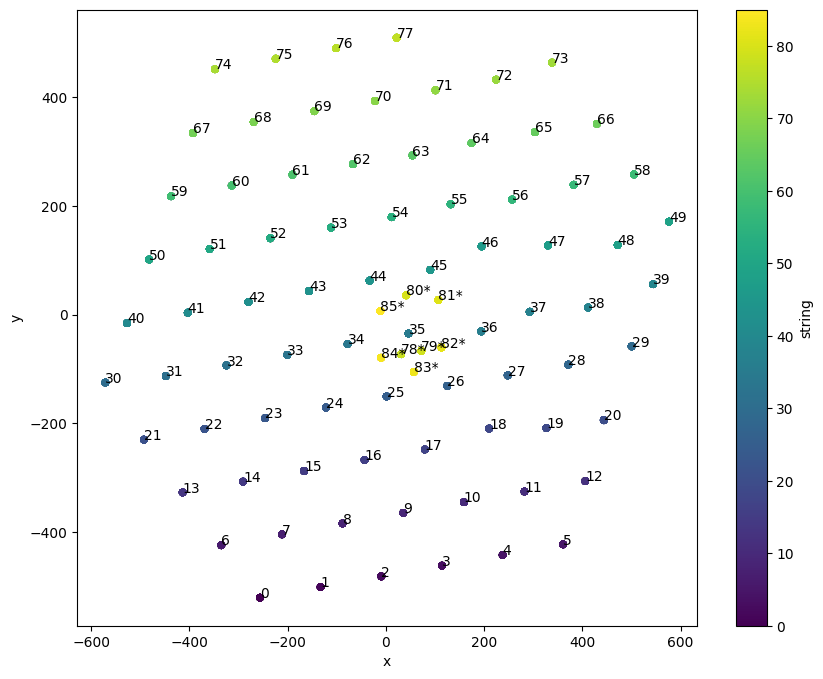

In [7]:
x = sensors[["x", "y", "string"]].plot(kind="scatter", x="x", y="y", c="string", cmap="viridis", figsize=(10, 8));

for index, row in sensors.iterrows():
    if index % 60 == 0:
        s = str(int(row["string"]))
        if row["string"] in range(78, 86):
            s += "*"
        plt.annotate(s, (row["x"], row["y"] + 0.2))
        
# Strings 78-85 are Veto (top 10 DOMs) & DeepCore (bottom 50 DOMs)

In [8]:
meta = pd.read_parquet(INPUT_PATH / "train_meta.parquet")
meta.shape

(131953924, 6)

In [9]:
batch = pd.read_parquet(INPUT_PATH / "train" / "batch_1.parquet")
batch.shape

(32792416, 4)

In [10]:
meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


In [13]:
meta.describe()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
count,1.319539e+08,131953924.0,1.319539e+08,1.319539e+08,1.319539e+08,1.319539e+08
mean,3.303849e+02,1073797031.019085,1.643336e+07,1.643352e+07,3.144113e+00,1.534419e+00
std,1.904591e+02,619985309.941458,9.505803e+06,9.505803e+06,1.813510e+00,6.901115e-01
min,1.000000e+00,24.0,0.000000e+00,2.700000e+01,6.436840e-08,8.631675e-05
25%,1.650000e+02,536833166.0,8.202315e+06,8.202470e+06,1.575369e+00,1.005033e+00
50%,3.300000e+02,1073824892.0,1.641943e+07,1.641959e+07,3.141370e+00,1.526995e+00
75%,4.950000e+02,1610750308.5,2.465248e+07,2.465266e+07,4.717619e+00,2.054609e+00
max,6.600000e+02,2147483627.0,3.553534e+07,3.553541e+07,6.283185e+00,3.141562e+00


In [11]:
batch.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True


In [12]:
event_24 = batch.loc[24]
event_24

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


In [13]:
event_24.query("sensor_id == 557")

,sensor_id,time,charge,auxiliary
event_id,,,,
24,557,12206,1.225,False
24,557,12227,0.975,False
24,557,12377,0.725,False
24,557,12436,0.175,False


In [14]:
event_24["auxiliary"].value_counts()

True     48
False    13
Name: auxiliary, dtype: int64

# Figure out the CV strategy

In [15]:
del meta["azimuth"]
del meta["zenith"]

meta["n_pulses"] = meta["last_pulse_index"] - meta["first_pulse_index"]

meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,n_pulses
0,1,24,0,60,60
1,1,41,61,111,50
2,1,59,112,147,35
3,1,67,148,289,141
4,1,72,290,351,61


<AxesSubplot: >

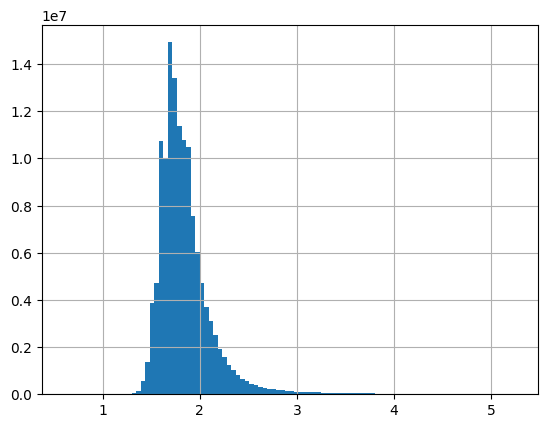

In [16]:
np.log10(meta["n_pulses"]).hist(bins=100)

In [ ]:
meta.sort_values(by="n_pulses").tail(50)